## Carregamento e análise dos dados

### Load do Dataset que vai servir de base para nosso treinamento

In [1]:
from tensorflow import keras

# Definição do nosso Dataset com as informações da base de dados do keras
dataset = keras.datasets.fashion_mnist

# dataset.load_data() => retorna um conjunto de duas tuplas com as informações de treino e teste
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Formato dos nossos dados

In [2]:
display(imagens_treino.shape)
display(imagens_teste.shape)

(60000, 28, 28)

(10000, 28, 28)

In [3]:
display(identificacoes_treino.shape)
display(identificacoes_teste.shape)

(60000,)

(10000,)

### Exibição de exemplos do nosso Dataset

Text(0.5, 1.0, '9')

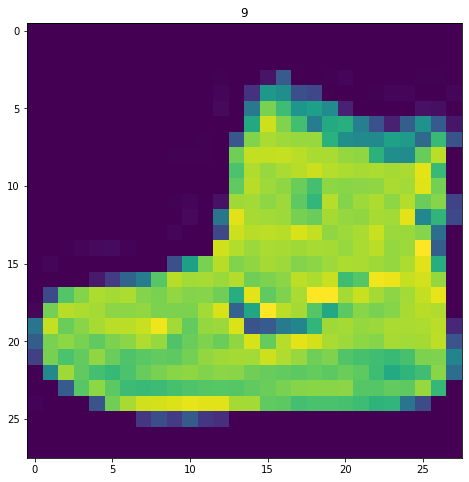

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Função da Lib para exibir imagens => passando o index de onde a imagem está
plt.imshow(imagens_treino[0])

# Função para colocar titulo no gráfico => passando o index da identificação do nosso treino
plt.title(identificacoes_treino[0])

In [5]:
display(identificacoes_treino.min())
display(identificacoes_treino.max())
total_classificacoes = 10
print(f"Total de classificações: {total_classificacoes}")

0

9

Total de classificações: 10


### Escala de cor na imagem
 - Futuramente será feita uma redução para evitar "loss"

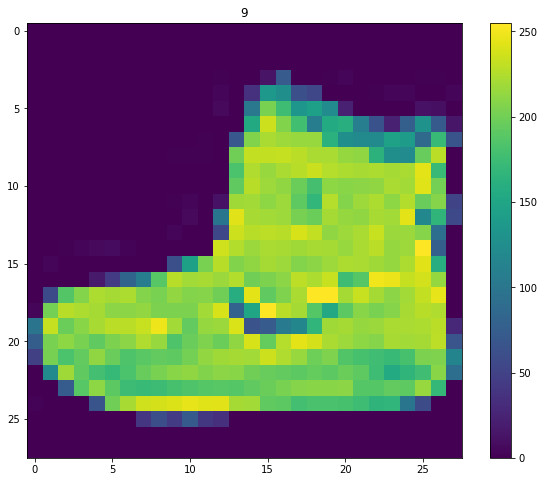

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

### Exemplos de classificações dentro do Dataset

In [7]:
# Mapeamento dos nomes de cada classificação com base no Github oficial
nomes_classificacoes = ["Camiseta", "Calça", " Pullover", 
                        "Vestido", "Casaco", "Sandalha", 
                        "Camisa", "Tenis", "Bolsa", "Bota"]

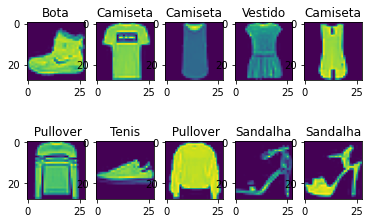

In [8]:
for imagem in range(10):
    # Função do subplot serve para mostrar diversas imagens dentro de um "for"
    # Passando o número de linhas, o número de colunas e a quantidade de repetição
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    # nomes_classificacoes[identificacoes_treino[imagem]] => identificacoes_treino[imagem] retorna um número com a posição no
    # vetor de mapeamento para mostrar bonitinho nos gráficos
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

## Construção do modelo
   - Modelo:
    - Entrada
    - Processamento
    - Saída

In [19]:
import tensorflow

# Normalização
# Escalonamento para reduzir o "loss"
# Divisão da escala de cor da imagem para ficar entre 0 e 1
imagens_treino = imagens_treino/255.0

# Sequencia de passos do modelo
model = keras.Sequential([
    # Entrada
    # Definição dos layers com o achatamento das nossas duas dimensões de para uma dimensão só
    keras.layers.Flatten(input_shape=(28, 28)), # Camada 0
    
    # Processamento
    # Número de "bolinhas" da camada e metodologia de ativação
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # Camada Densa, conectividade com todas as outras "bolinhas"
    
    # Adormecer camadas para evitar o vício
    keras.layers.Dropout(0.2), # Convenção de 20% dos neuronios dormindo
    
    # Camadas Ocultas
    # Teste de possíveis camadas intermediárias para verificar resultados diferentes
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
#     keras.layers.Dense(64, activation=tensorflow.nn.relu),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(32, activation=tensorflow.nn.relu),
    
    # Saída
    # Número de "bolinhas" é igual ao número de classificações que nós temos e a ativação
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

# Teste de hiperparâmetros
# lr = learning rate, quanto menor, mais devagar a rede vai aprender, mas com melhor qualidade
adam = keras.optimizers.Adam(lr=0.0001)

# Verifica se o critério selecionado não está avançando para parar o treino
parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                                monitor='val_loss',
                                                save_best_only=True)]

# É preciso compilar o modelo antes de treinar/testar
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento do modelo => passando o x, y e número de ciclos de treino que devem ser realizados
# Argumento para fazer validação no fit
historico = model.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, callbacks=parando_cedo)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.1887 - accuracy: 0.4989 - val_loss: 1.6472 - val_accuracy: 0.5892
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5218 - accuracy: 0.5822 - val_loss: 1.2261 - val_accuracy: 0.6539
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1841 - accuracy: 0.6421 - val_loss: 1.0263 - val_accuracy: 0.6958
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0117 - accuracy: 0.6828 - val_loss: 0.9044 - val_accuracy: 0.7197
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9035 - accuracy: 0.7099 - val_loss: 0.8230 - val_accuracy: 0.7302


## Estudo de como a rede aprende

### Sumário do modelo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da primeira camada Dense

In [11]:
# Pesos que são atribuidos aos diversos resultados da nossa rede
pesos_camada_dense = model.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.04065812, -0.04214718,  0.04274965, ..., -0.05547762,
         0.0399233 ,  0.00984005],
       [-0.04050267,  0.03141684,  0.05701008, ...,  0.02951168,
         0.0228639 , -0.05300029],
       [ 0.01847146,  0.00169865,  0.00464239, ..., -0.03395605,
        -0.07376297, -0.03109008],
       ...,
       [ 0.0056598 ,  0.03807653,  0.05628157, ..., -0.06651226,
         0.05643793,  0.0041087 ],
       [-0.00504908, -0.02197486, -0.00395381, ..., -0.00813548,
        -0.04617606, -0.08913353],
       [-0.01507591, -0.05034718, -0.006443  , ..., -0.04223078,
         0.04700093, -0.01810477]], dtype=float32)

In [12]:
# Vieses da nossa rede, significa o grau de proximidade de um resultado correto
# Quanto menor melhor
vieses_camada_dense = model.layers[1].get_weights()[1]
vieses_camada_dense

array([-0.05697681,  0.08993714,  0.00975243,  0.10156737,  0.04402828,
        0.06556603, -0.02392668,  0.05608854,  0.042653  ,  0.06551771,
        0.07516716,  0.12077757,  0.1582537 , -0.10256157,  0.07195862,
        0.00061992,  0.04567504, -0.01618297,  0.03106097,  0.01246576,
        0.08116414,  0.04082162,  0.02477458,  0.04956153,  0.05992756,
       -0.05956043,  0.14789034, -0.03552907,  0.12301994, -0.03739733,
        0.03215962, -0.00984224, -0.03878978,  0.03378085,  0.09023175,
        0.01972319, -0.00546256, -0.02023327,  0.02922387,  0.00130108,
       -0.04963186, -0.02479585, -0.00981421,  0.02674759, -0.07888421,
       -0.00439323,  0.13108727,  0.06569903, -0.03073074,  0.04995208,
        0.12311522,  0.04069601,  0.11330412,  0.07148398,  0.0178703 ,
        0.05869368,  0.01614958,  0.05300322, -0.0726407 ,  0.03070204,
       -0.06912853,  0.03083448,  0.05627945,  0.08366044, -0.0603172 ,
        0.03107234,  0.02493805, -0.00669165,  0.0918259 ,  0.05

#### Fazendo um teste com todos os pesos zerados

In [13]:
import numpy as np
'''
# Formato do nosso array de peso
display(pesos_camada_dense.shape)

#################
# Pesos zerados #
#################
# Criando array de zeros
pesos_camada_dense_zerados = np.zeros((784, 256))
# Modificando os pesos para zero, é preciso passar os dois parâmetros
model.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

####################
# Pesos aleatorios #
####################
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
# Modificando os pesos para zero, é preciso passar os dois parâmetros
model.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

# Treino do modelo com os dados zuados
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = model.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
'''

"\n# Formato do nosso array de peso\ndisplay(pesos_camada_dense.shape)\n\n#################\n# Pesos zerados #\n#################\n# Criando array de zeros\npesos_camada_dense_zerados = np.zeros((784, 256))\n# Modificando os pesos para zero, é preciso passar os dois parâmetros\nmodel.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])\n\n####################\n# Pesos aleatorios #\n####################\npesos_camada_dense_aleatorios = np.random.rand(784, 256)\n# Modificando os pesos para zero, é preciso passar os dois parâmetros\nmodel.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])\n\n# Treino do modelo com os dados zuados\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\nhistorico = model.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)\n"

In [14]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

### Salvando e carregando o modelo

In [15]:
from tensorflow.keras.models import load_model

# Método para salvar o modelo
model.save("modelo2.h5")

# Método para carregar o modelo
modelo_salvo = load_model("modelo2.h5")

## Analisando o resultado do treinamento e validação

{'loss': [0.7408419847488403,
  0.4977107048034668,
  0.44497445225715637,
  0.41143476963043213,
  0.3906440734863281],
 'accuracy': [0.7553541660308838,
  0.8306249976158142,
  0.8474375009536743,
  0.8577291369438171,
  0.862583339214325],
 'val_loss': [0.5210338830947876,
  0.45319461822509766,
  0.4213610887527466,
  0.40027743577957153,
  0.3795076608657837],
 'val_accuracy': [0.8240000009536743,
  0.8429166674613953,
  0.8552500009536743,
  0.8577499985694885,
  0.8666666746139526]}

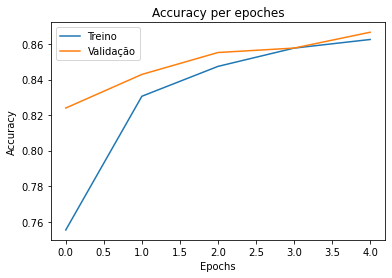

In [16]:
# Retorna um dicionário com todas as métricas do fit
display(historico.history)

# Maneira de acessar as informações dentro do dicionário
val_acc = historico.history['val_accuracy']
acc = historico.history['accuracy']
val_loss = historico.history['val_loss']
loss = historico.history['loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy per epoches")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Treino", "Validação"])

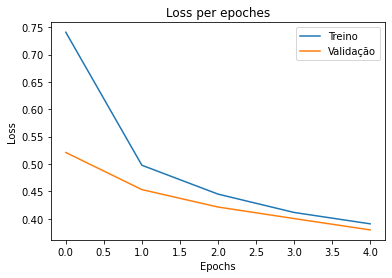

In [17]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss per epoches")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Treino", "Validação"])

## Validação dos dados

In [18]:
import numpy as np

imagens_teste = imagens_teste/255.0

# Avaliação do modelo
# Retorna o "loss" e a accuracy do modelo
display(model.evaluate(imagens_teste, identificacoes_teste))

# Avaliação modelo salvo
display(modelo_salvo.evaluate(imagens_teste, identificacoes_teste))

313/313 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.8568


[0.4029495418071747, 0.8568000197410583]

313/313 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8568


[0.4029495418071747, 0.8568000197410583]